In [1]:
import torch.nn.functional as F
import torch

target = torch.randn([3,23,23])
pred = torch.randn([3,23,23])

F.mse_loss(target,pred),F.mse_loss(pred,target)

(tensor(2.1387), tensor(2.1387))

## Testing Expiriment-class

In [9]:
from nnstatviz import Expiriment
import os
import sys
sys.path.append(os.path.abspath('../data'))
import recreate_model
import torchvision
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize([128,128]),
    torchvision.transforms.ToTensor()
])

dataset = torchvision.datasets.CIFAR10(root='../data/cifar_10',
                                       train=True,
                                       transform=transform,
                                       download=False)

model = recreate_model.VQVAE()
model_viz = Expiriment(model)
model_viz.load_model('weights.pt')
model_viz.save_gradient_hooks()
model_viz.train_model(dataset,16,1500)

name: encoder.layers.0.layers, module:Conv2d(3, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)) **CONV/Tranpose
Registering hook.
name: encoder.layers.1, module:GroupNorm(32, 256, eps=1e-05, affine=True) **NORM
Registering hook.
name: encoder.layers.2.layers, module:Conv2d(256, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)) **CONV/Tranpose
Registering hook.
name: encoder.layers.3.layers.0, module:GroupNorm(32, 256, eps=1e-05, affine=True) **NORM
Registering hook.
name: encoder.layers.3.layers.1, module:ReLU() **activation
Registering hook.
name: encoder.layers.3.layers.2, module:Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) **CONV/Tranpose
Registering hook.
name: encoder.layers.3.layers.3, module:ReLU() **activation
Registering hook.
name: encoder.layers.3.layers.4, module:GroupNorm(32, 256, eps=1e-05, affine=True) **NORM
Registering hook.
name: encoder.layers.3.layers.5, module:Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1)) **CONV/Tranpose
R

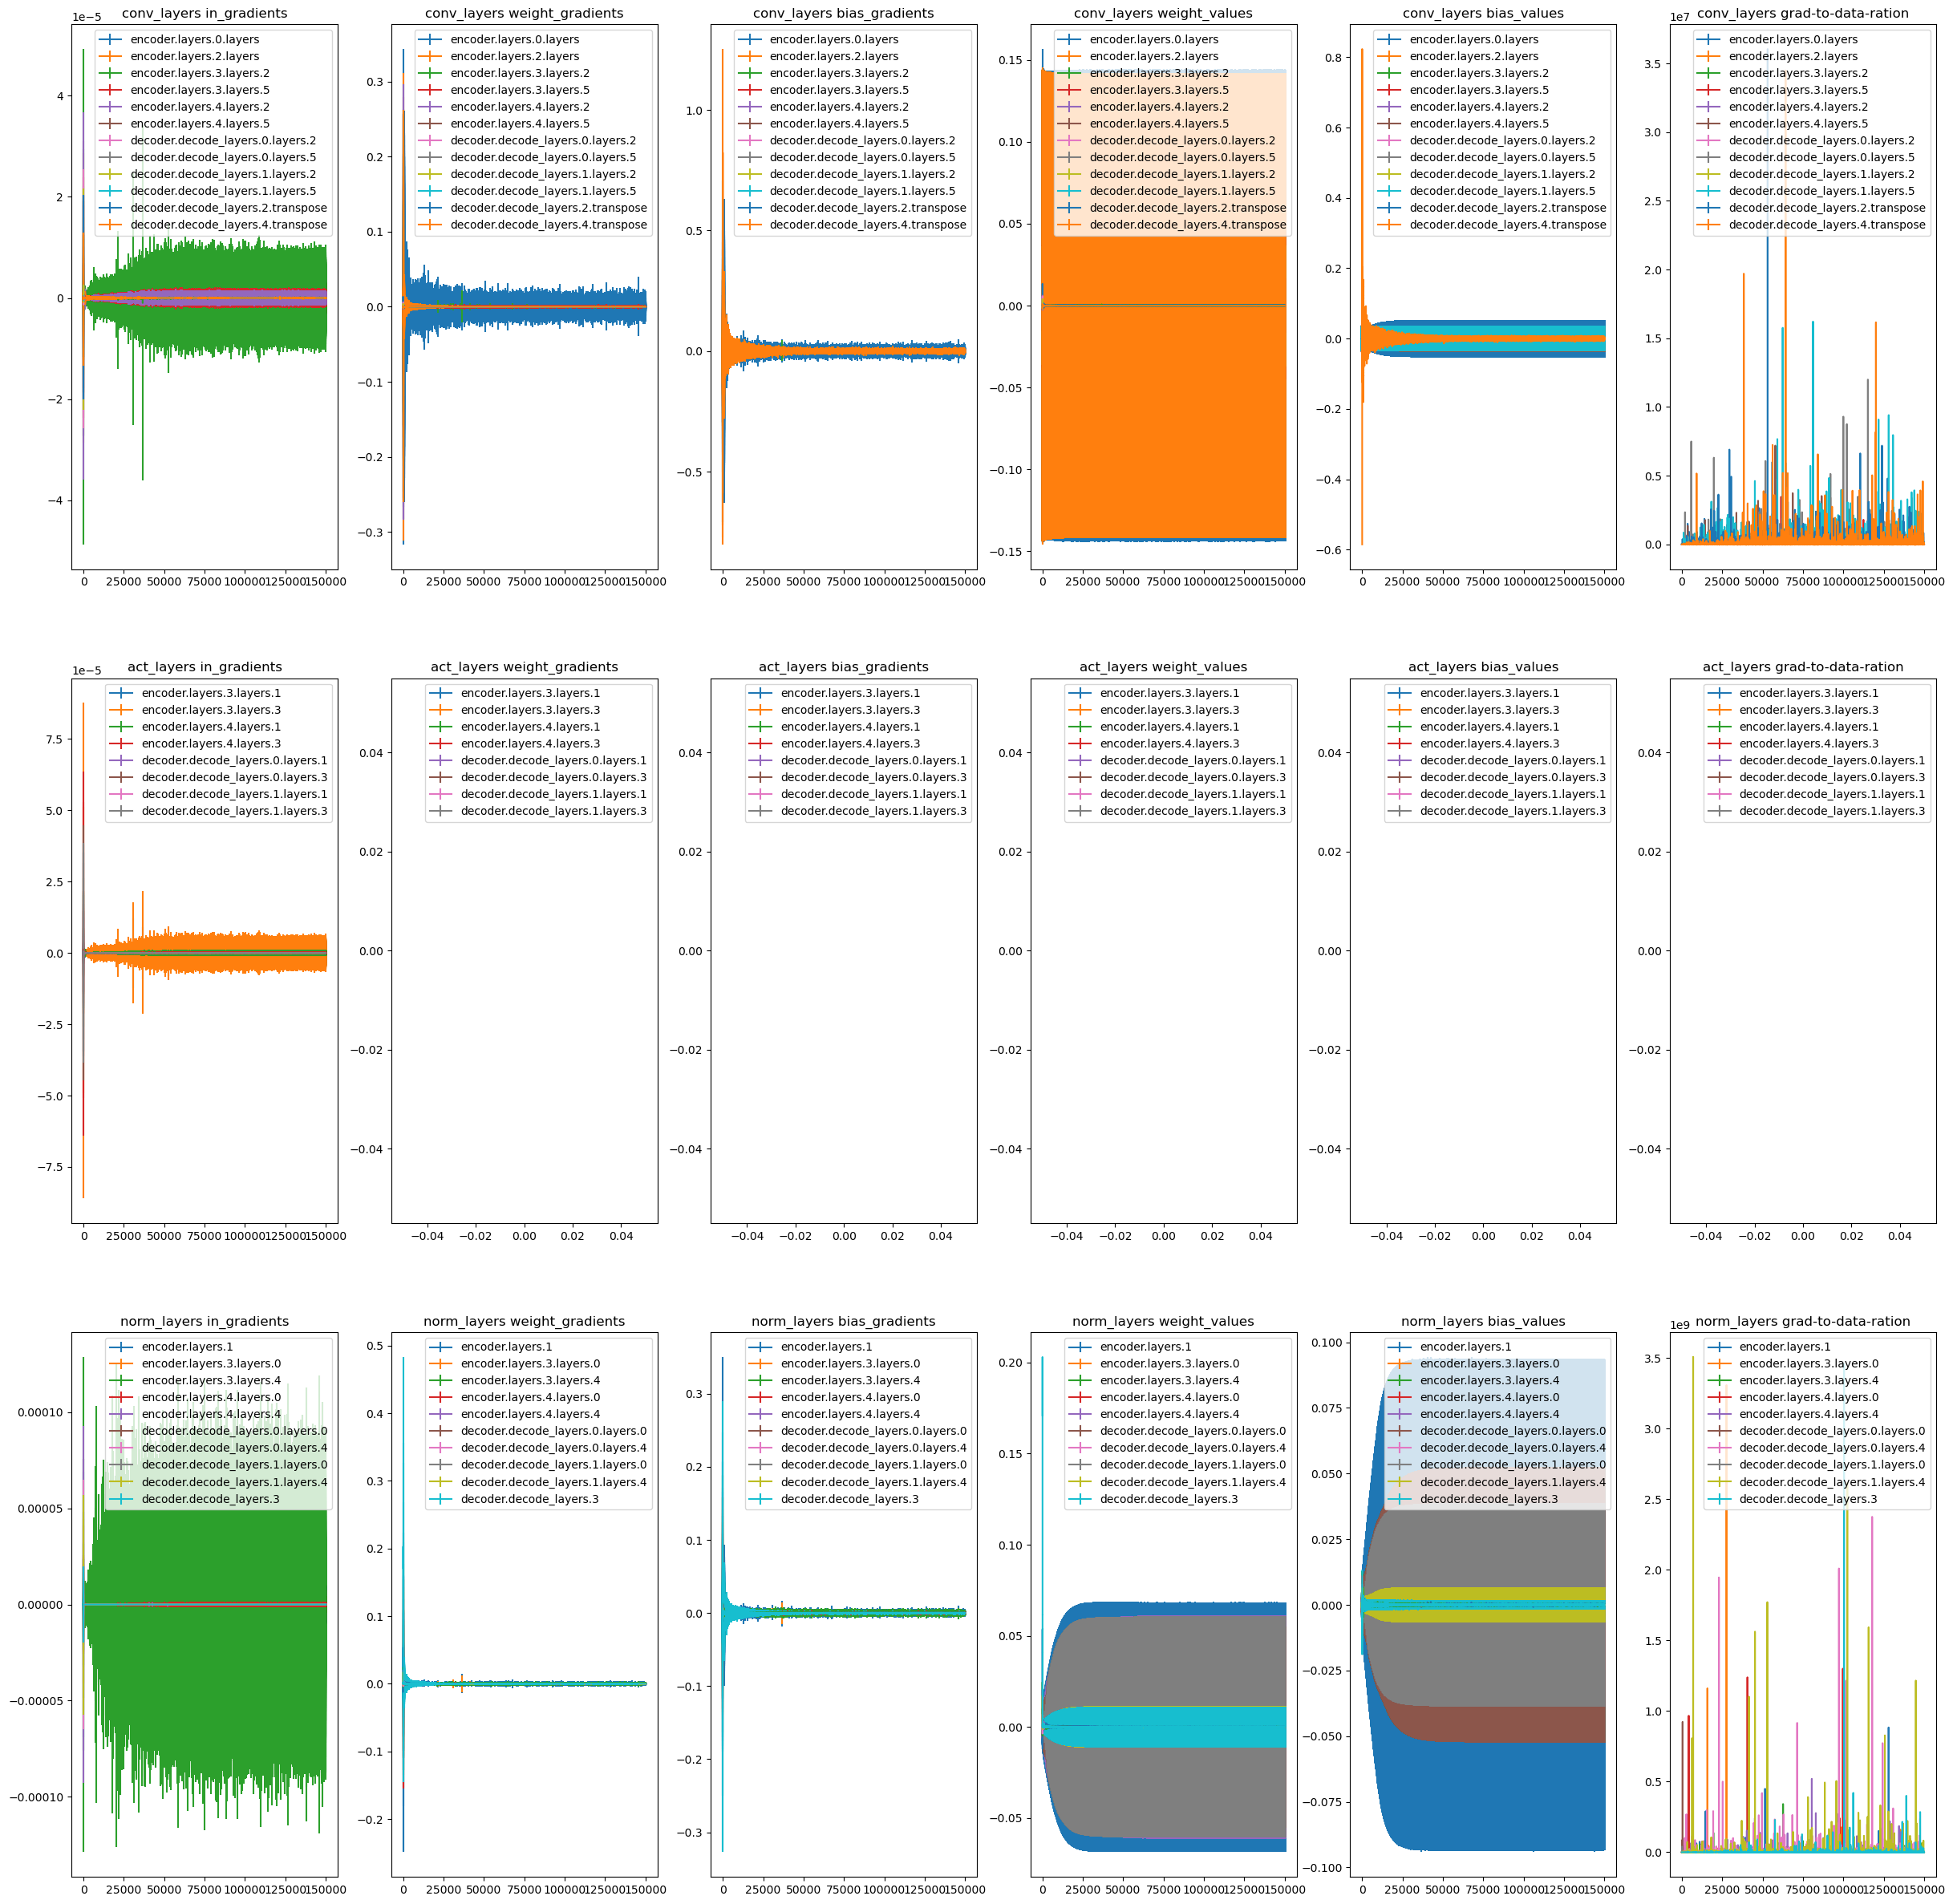

In [6]:
# plotting
model_viz.plot_gradients_over_time()

## Added gradient-clipping

This should stop the insane 25000 grad-data ratios! Is this a historical problem in NNs?